<h2>Example 2: Chain Event Graph from Non-Stratified Dataset</h2>

This example builds a Chain Event Graph (CEG) from a asymmetric dataset. In simple words, a dataset is asymmetric when the event tree describing the dataset is not symmetric around its root. The class of CEGs built from asymmetric event trees is said to be _non-stratified_. Note that, technically, a CEG is also said to be non-stratified when the order of events along its different paths is not the same, even though its event tree might be symmetric. Whilst such processes can also be easily modelled with the `cegpy` package, for this example we focus on non-stratified CEGs that are built from asymmetric event trees/datasets.  

Asymmetry in a dataset arises when it has structural zeros or structural missing values in certain rows; in other words, the sample space of a variable is different or empty respectively, depending on its ancestral variables. So logically, certain values of the variable will never be observed for certain configurations of its ancestral variables, irrespective of the sample size. 

In this example, we consider the `falls.xlsx` dataset. Here, by interventional design, individuals who are not assessed are not offered referral or treatment. In this case, we would observe individuals in our dataset who are not assessed, going down the ‘Not Referred & Not Treated’ path with probability 1. This is not helpful, and so we choose to condense the tree and remove this edge. The zero observations for non-assessed individuals for the categories of ‘Referred & Treated’ and ‘Not Referred & Treated’ are both structural zeros.

In [1]:
from cegpy import EventTree
import pandas as pd
%pip install openpyxl

dataframe = pd.read_excel("falls.xlsx")
dataframe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


,HousingAssessment,Risk,Treatment,Fall
0,Community Not Assessed,Low Risk,NaN,Fall
1,Community Not Assessed,High Risk,NaN,Fall
2,Community Not Assessed,Low Risk,NaN,Don't Fall
3,Community Not Assessed,Low Risk,NaN,Don't Fall
4,Community Not Assessed,Low Risk,NaN,Fall
...,...,...,...,...
49995,Community Not Assessed,Low Risk,NaN,Don't Fall
49996,Community Not Assessed,Low Risk,NaN,Don't Fall
49997,Community Not Assessed,Low Risk,NaN,Don't Fall
49998,Community Not Assessed,Low Risk,NaN,Fall


_Note: When looking at the description of the dataset, the total count in the 'Treament' column is not equal to the counts for the other columns. This is the giveaway that the dataset is non-stratified. Extreme care must be taken to ensure that the dataset really is non-stratified, and doesn't simply have sampling-zeros or sampling missing values. The package has no way of distinguishing these on its own unless the user specifies them. For more information, please see the `4_sampling_missing_values.ipynb` example._

In [2]:
dataframe.describe()

,HousingAssessment,Risk,Treatment,Fall
count,50000,50000,3250,50000
unique,4,2,3,2
top,Community Not Assessed,Low Risk,Not Referred & Not Treated,Don't Fall
freq,45211,42505,1768,34737


The end result of this is that in the `EventTree` shown below, paths such as S<SUB>0</SUB> -> S<SUB>2</SUB> -> S<SUB>7</SUB> -> S<SUB>18</SUB> skip the 'Treatment' variable. 

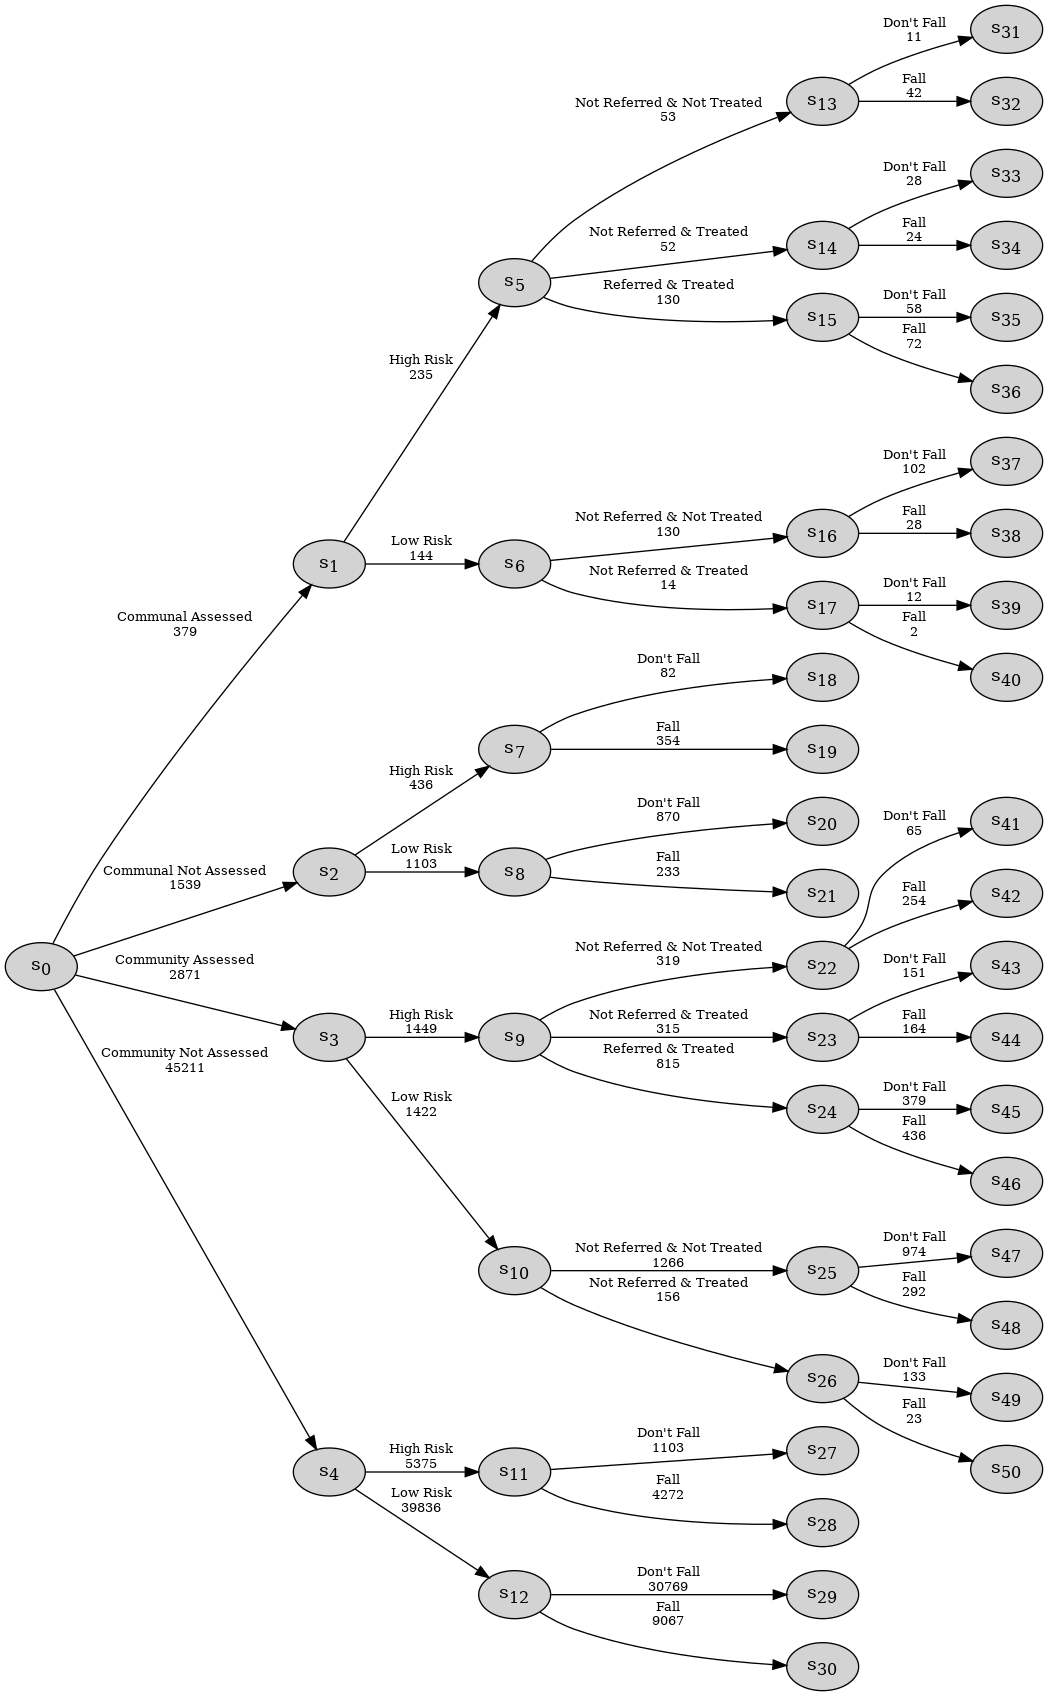

In [3]:
event_tree = EventTree(dataframe)
event_tree.create_figure()

<h3>Chain Event Graph Construction</h3>

As in the stratified medical example (see: `1_basic_example.ipynb`), after initial checks on the dataset, and confirmation that the `EventTree` looks as expected, the next step is to identify the stages. For this, we use the `StagedTree` class, which first creates the `EventTree` internally, ready for the user to run a clustering algorithm on it. In this example we use the `.calculate_AHC_transitions()` method, which excutes the agglommerative hierarchical clustering (AHC) algorithm on the `EventTree`. The package functions under a Bayesian framework and priors can be supplied to the AHC algorithm to override the default settings, see `5_ahc_customisation.ipynb`. 

The resultant CEG has been reduced from the tree respresentation to a more compact graph.


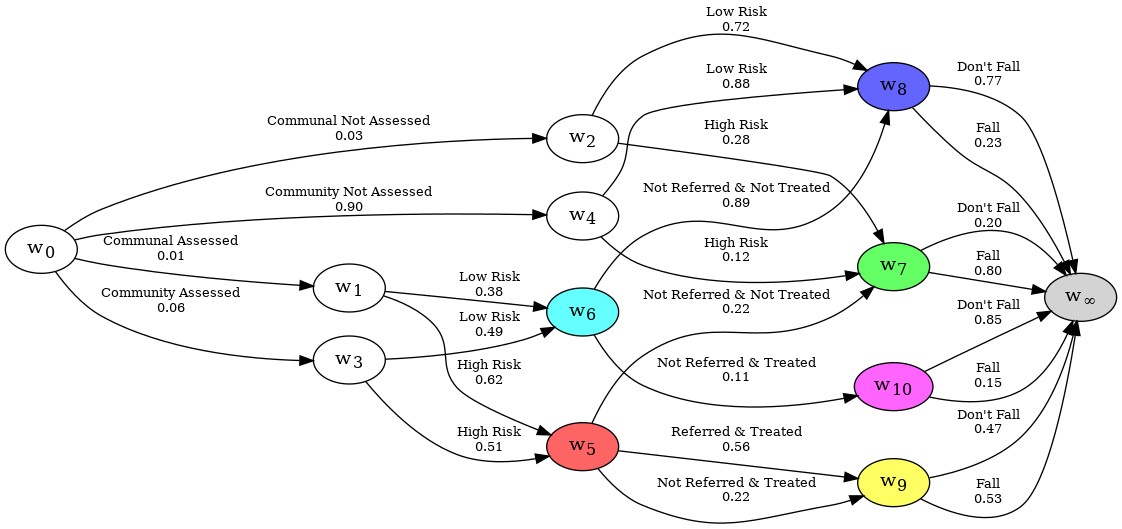

In [4]:
from cegpy import ChainEventGraph, StagedTree

st = StagedTree(dataframe)
st.calculate_AHC_transitions()

ceg = ChainEventGraph(st)
ceg.create_figure()